# Hypothesis Testing
## Nivell 1
### Exercici 1 
##### Calcula el p-valor i digues si rebutja la hipòtesi nul·la agafant un alfa de 5%. 




In [164]:
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from scipy.stats import ttest_1samp, ttest_ind, f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [90]:
df = pd.read_csv(r'C:/Users/adria/tasca 8/fifa_cleaned.csv')

In [28]:
df.head() 

,id,name,full_name,birth_date,age,height_cm,weight_kgs,positions,nationality,overall_rating,...,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB
0,158023,L. Messi,Lionel Andrés Messi Cuccittini,1987-06-24,31,170.18,72.1,"CF,RW,ST",Argentina,94,...,64+2,61+2,61+2,61+2,64+2,59+2,48+2,48+2,48+2,59+2
1,190460,C. Eriksen,Christian Dannemann Eriksen,1992-02-14,27,154.94,76.2,"CAM,RM,CM",Denmark,88,...,71+3,71+3,71+3,71+3,71+3,66+3,57+3,57+3,57+3,66+3
2,195864,P. Pogba,Paul Pogba,1993-03-15,25,190.50,83.9,"CM,CAM",France,88,...,76+3,77+3,77+3,77+3,76+3,74+3,72+3,72+3,72+3,74+3
3,198219,L. Insigne,Lorenzo Insigne,1991-06-04,27,162.56,59.0,"LW,ST",Italy,88,...,63+3,58+3,58+3,58+3,63+3,58+3,44+3,44+3,44+3,58+3
4,201024,K. Koulibaly,Kalidou Koulibaly,1991-06-20,27,187.96,88.9,CB,Senegal,88,...,73+3,77+3,77+3,77+3,73+3,76+3,85+3,85+3,85+3,76+3


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17954 entries, 0 to 17953
Data columns (total 92 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             17954 non-null  int64  
 1   name                           17954 non-null  object 
 2   full_name                      17954 non-null  object 
 3   birth_date                     17954 non-null  object 
 4   age                            17954 non-null  int64  
 5   height_cm                      17954 non-null  float64
 6   weight_kgs                     17954 non-null  float64
 7   positions                      17954 non-null  object 
 8   nationality                    17954 non-null  object 
 9   overall_rating                 17954 non-null  int64  
 10  potential                      17954 non-null  int64  
 11  value_euro                     17699 non-null  float64
 12  wage_euro                      17708 non-null 

<AxesSubplot:xlabel='age', ylabel='Count'>

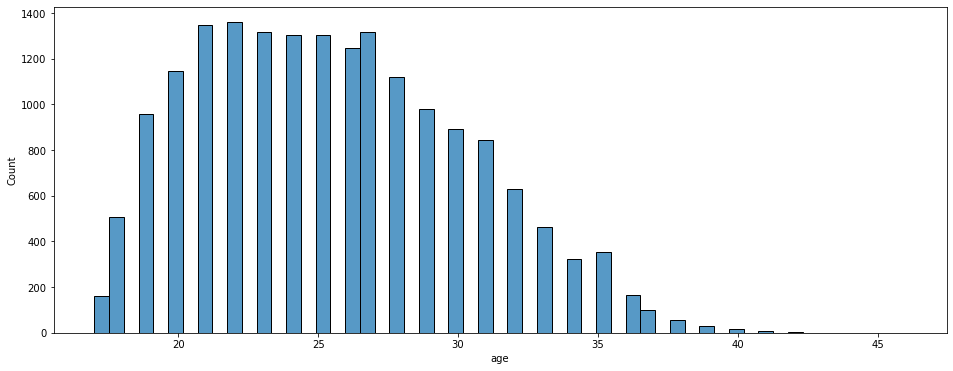

In [30]:
## histograma  edats
plt.figure(figsize=(16, 6))
sns.histplot(data=df, x='age')


In [33]:
## mitjana de edat
print('the mean of age is :',round(df['age'].mean(),3))

the mean of age is : 25.565


### Hipotesis:


   - $ H_{0} : \mu_{M} = 25 $  
   - $ H_{1} : \mu_{M} \neq 25 $
     

In [38]:
ALPHA = 0.05

stat, p = ttest_1samp(df['age'], popmean = 25)
print(f't-stadistic= {stat:.3f}\np-value={p:.3f}')
print('We can not reject h0')if p>ALPHA else print('we can reject H0')

t-stadistic= 16.101
p-value=0.000
we can reject H0


conclusio:
Rebujemt la hipotesis de que la mitja d'edat esta en 25 anys




# Nivell 2
## Exercici 2 
Continua amb el conjunt de dades de tema esportiu que t'agradi i selecciona dos altres atributs del conjunt de dades. Calcula els p-valors i digues si rebutgen la hipòtesi nul·la agafant un alfa de 5%.

In [87]:
filter = (df['nationality']=='England') |(df['nationality']=='Germany')


In [91]:
nations=df.where(filter)

<AxesSubplot:xlabel='age', ylabel='Count'>

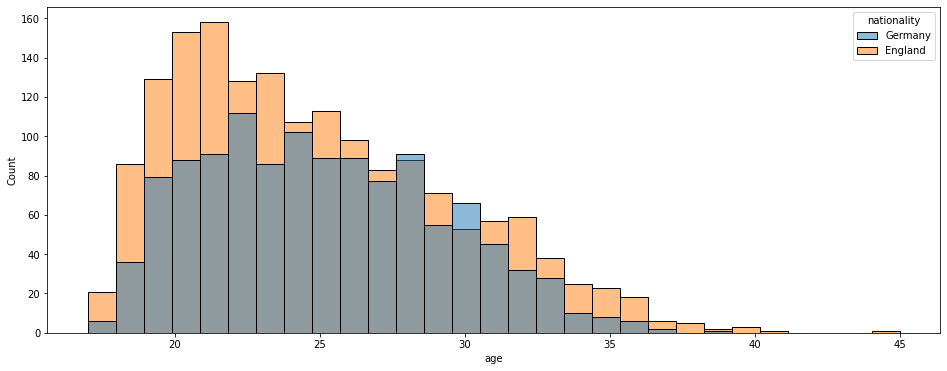

In [98]:
nations.dropna()
plt.figure(figsize=(16, 6))
sns.histplot(data=nations, x='age',hue='nationality')

### Hipotesis:


   - $ H_{0} : \mu_{G} =\mu_{E} $ l'edat mitjana de jugadors alemans es **igual** a la dels jugadors anglesos 
   - $ H_{1} : \mu_{G} \neq \mu_{E}  $ l'edad mitjana de jugadors alemans **no es igual** a la dels jugadors anglesos
     

In [143]:
alpha = 0.05
age_england = nations.loc[nations.nationality=='England','age']
age_germany = nations.loc[nations.nationality == 'Germany','age']
print('england=',age_england.mean(),'germany=',age_germany.mean())
stat, p = ttest_ind(age_england,age_germany)
print(f't-stadistic ={stat:.3f}\np-value ={stat:.3f}')
print('We can not reject H0') if p > alpha else print('We can reject H0')


england= 24.60132689987937 germany= 24.891576313594662
t-stadistic =-1.660
p-value =-1.660
We can not reject H0


conclusió:
no rebutjem la hipotesis nula ja que no arriba al 0.05 de significança


# Nivell 3
## Exercici 3
Continua amb el conjunt de dades de tema esportiu que t'agradi i selecciona tres atributs del conjunt de dades. Calcula el p-valor i digues si rebutja la hipòtesi nul·la agafant un alfa de 5%.





In [197]:
filter = (df['nationality']=='Italy') |(df['nationality']=='England')|(df['nationality']=='Spain')

<AxesSubplot:xlabel='overall_rating', ylabel='Count'>

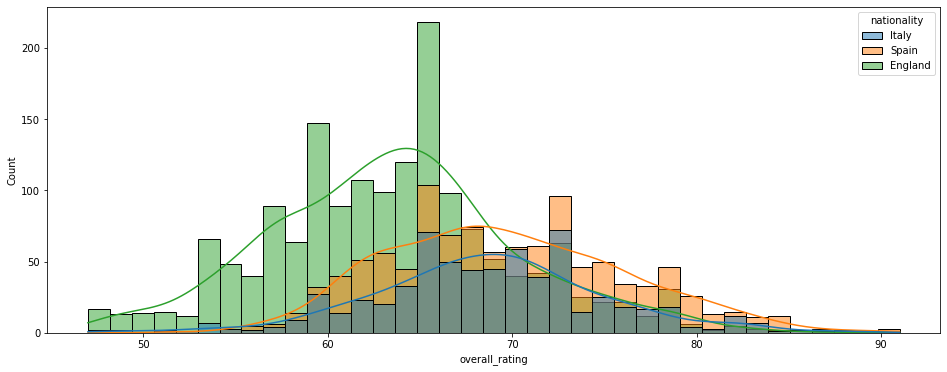

In [217]:
nations=df.where(filter)
nations.dropna()
plt.figure(figsize=(16, 6))
sns.histplot(data=nations, x='overall_rating',hue='nationality',kde=True)

### Hipotesis:


   - $ H_{0} : \mu_{I} =\mu_{S} =\mu_{E} $ Els jugadors anglesos , italians i espanyols de mitja  estan **igual** de valorats
   - $ H_{1} : \mu_{I} \neq \mu_{S}\neq \mu_{E}  $ Els jugadors anglesos , italians i espanyols de mitja **no estan igual** de valorats
     

In [219]:
alpha = 0.05
England = nations.loc[nations.nationality=='England','overall_rating']
Italy = nations.loc[nations.nationality=='Italy','overall_rating']
Spain = nations.loc[nations.nationality=='Spain','overall_rating']
stats, p = f_oneway(Italy,Spain,England)
print(f'F-statistic = {stat:.3f}\np-value = {p:.3f}')
print('We can not reject H0') if p > ALPHA else print('We can reject H0')

F-statistic = -1.660
p-value = 0.000
We can reject H0


Conclusió:

Disposem de prou evidencia per rebutjar la hipotesis nula amb una significancia del 5% que els jugadors  italians , espanyos i anglesos no estan igual de ben valorats